# 🤖 Real vs. AI-Generated Face Detection

## 🎯 **Learning Objectives**

By completing this, I have:
- **Master** fundamental deep learning techniques from simple MLPs to advanced CNNs
- **Implement** data augmentation strategies to improve model generalization
- **Apply** transfer learning using state-of-the-art pre-trained models
- **Optimize** models through fine-tuning, batch normalization and other techniques
- **Deploy** an interactive web application for real-world testing
- **Analyze** and compare different architectural approaches

## 🗂️ **Assignment Structure**

| Part | Topic | Description | Key Skills | Status |
|------|-------|-------------|------------|--------|
| **0** | 🗂️ Dataset Setup | Load and preprocess face images | Data handling, normalization | ✅ Provided |
| **1** | 🔍 Data Exploration | Visualize and understand the dataset | EDA, visualization | ✅ Provided |
| **2** | 🧠 MLP Baseline | Build a simple neural network classifier | Dense layers, fundamentals | ✅ Provided |
| **3** | 🖼️ CNN Implementation | Design a convolutional neural network | Conv2D, pooling, spatial features | ✅ Provided |
| **4** | 🎨 Data Augmentation | Enhance training with image transformations | ImageDataGenerator, regularization | 📝 **TODO** |
| **5** | 🚀 Transfer Learning | Leverage MobileNetV2 pre-trained model | Feature extraction, fine-tuning | 📝 **TODO** |
| **6** | 🔧 Fine-Tuning | Unfreeze and optimize top layers | Advanced optimization | 📝 **TODO** |
| **7** | 📊 Model Comparison | Analyze all models comprehensively | Performance analysis, visualization | 📝 **TODO** |
| **8** | 🎮 Interactive Demo | Build and deploy a Gradio game | Deployment, UI/UX design | 📝 **TODO** |


## 📊 **Dataset Information**
- **Source**: Curated collection of real and AI-generated faces
- **Size**: ~1200 RGB images (128×128×3 pixels)
- **Classes**: Binary classification (Real vs. AI-generated)
- **Automatic Download**: The dataset will be automatically downloaded from the instructor's Google Drive when you run Part 0
- **Directory Structure**:
  - `training_real/` - Real face images for training
  - `training_AI/` - AI-generated face images for training
  - `test_real/` - Real face images for testing
  - `test_AI/` - AI-generated face images for testing
- **Important**: The test set is fixed and identical for all students to ensure fair comparison across the class

---

🚀 **Let's begin! Run the cells below sequentially to start your journey into distinguishing real from AI-generated faces!**

## Setup: Import Required Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

print(f"TensorFlow version: {tf.__version__}")
print(f"Running on: {'GPU' if tf.config.list_physical_devices('GPU') else 'CPU'}")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

TensorFlow version: 2.20.0
Running on: CPU


## 🗂️ Part 1: Dataset Setup & Preprocessing

### 📊 **What's happening in this section?**

In this initial setup phase, we're preparing our dataset for the exciting journey of distinguishing between **real human faces** and **AI-generated faces**!

#### 🎯 **Key Steps:**
- **📥 Dataset Download**: We fetch a curated dataset of face images from the course repository
- **🖼️ Image Processing**: All images are resized to 128×128 pixels
- **📈 Normalization**: Pixel values are scaled to [0,1] range for optimal neural network training
- **🔀 Data Splitting**: We organize our data into three sets:
  - **Test set**: Dedicated, separate set of 300 images (150 per class) for final evaluation
  - **Training set** (85%): For model learning
  - **Validation set** (15%): For hyperparameter tuning


#### ⚠️ **Important Notes:**
- This cell contains pre-configured code that should **NOT be modified**
- The dataset is balanced with equal numbers of real and AI-generated faces
- All images are processed identically to ensure fair comparison

Insert Appropriate path for the dataset

🚀 **Run the cell below to automatically download and prepare your dataset!**

In [ ]:
# ============================================================
# Part 0 - Dataset Setup (Do NOT Modify)
# ============================================================

!pip install -q gdown

import gdown
import os
import zipfile
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Course dataset (hosted on instructor's Google Drive)
#FILE_ID = "1h0kxOEQ5tYvW3eb_xM2mdwhozgG6zPYo"  # Provided by instructor

FILE_ID = "154rbZmY2HI0qVbBVEJ1nbvoHDJmY7fQX"  # Provided by instructor
url = f"https://drive.google.com/uc?id={FILE_ID}"

print("📥 Downloading dataset from course repository...")
output_path = 'Output Path'

try:
    gdown.download(url, output_path, quiet=False)

    print("\n📦 Extracting files...")
    with zipfile.ZipFile(output_path, 'r') as zip_ref:
        zip_ref.extractall('Path')

    # Clean up zip file
    os.remove(output_path)

    # Verify the download
    real_count = len(os.listdir('Path'))
    fake_count = len(os.listdir('Path'))

    print("\n✅ Dataset successfully loaded!")
    print(f"   • Real faces: {real_count} images")
    print(f"   • AI faces: {fake_count} images")

except Exception as e:
    print(f"❌ Error downloading dataset: {e}")
    print("Please contact the instructor if this persists.")





[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


📥 Downloading dataset from course repository...


Downloading...
From (original): https://drive.google.com/uc?id=154rbZmY2HI0qVbBVEJ1nbvoHDJmY7fQX
From (redirected): https://drive.google.com/uc?id=154rbZmY2HI0qVbBVEJ1nbvoHDJmY7fQX&confirm=t&uuid=3b597502-ef77-4ca3-92fd-c11ffbccbc4f
To: F:\Study\Sem 4\Hw1\real_and_AI.zip
100%|██████████| 66.9M/66.9M [00:01<00:00, 46.6MB/s]



📦 Extracting files...

✅ Dataset successfully loaded!
   • Real faces: 1001 images
   • AI faces: 1001 images


In [ ]:
# ============================================================
# Load images into arrays (Do NOT Modify)
# ============================================================
print("\n" + "="*50)
print("Loading images into arrays...")

def load_images_from_folder(folder_path, label, max_images=600, target_size=(128, 128)):
    """
    Load images from a folder and assign a label.
    Images are converted to grayscale and normalized.
    """
    images, labels = [], []
    image_files = os.listdir(folder_path)[:max_images]

    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        try:
            img = Image.open(img_path)
            img = img.resize(target_size)
            img_array = np.array(img) / 255.0  # Normalize [0, 1]
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"⚠️ Error loading {img_file}: {e}")

    return np.array(images), np.array(labels)

# Paths
data_path = 'Path'

# Training images
print("Loading real training images...")
real_images, real_labels = load_images_from_folder(
    os.path.join(data_path, 'training_real'),
    label=1
)
print("Loading AI-generated training images...")
fake_images, fake_labels = load_images_from_folder(
    os.path.join(data_path, 'training_AI'),
    label=0
)

# Combine training
X = np.concatenate([real_images, fake_images])
y = np.concatenate([real_labels, fake_labels])

# Test images (new fixed folders)
print("Loading real test images...")
test_real_images, test_real_labels = load_images_from_folder(
    os.path.join(data_path, 'test_real'),
    label=1
)
print("Loading fake test images...")
test_fake_images, test_fake_labels = load_images_from_folder(
    os.path.join(data_path, 'test_AI'),
    label=0
)

X_test = np.concatenate([test_real_images, test_fake_images])
y_test = np.concatenate([test_real_labels, test_fake_labels])

# Reshape
X = X.reshape(X.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

# Split training further into train/val (70/15/15 overall)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

print(f"\n✅ Dataset ready for training!")
print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")
print(f"Image shape: {X_train[0].shape}")
print(f"Real images: {np.sum(y == 1)} | Fake images: {np.sum(y == 0)}")


Loading images into arrays...
Loading real training images...
⚠️ Error loading .DS_Store: cannot identify image file 'F:\\Study\\Sem 4\\Hw1\\real_and_AI\\training_real\\.DS_Store'
Loading AI-generated training images...
⚠️ Error loading .DS_Store: cannot identify image file 'F:\\Study\\Sem 4\\Hw1\\real_and_AI\\training_AI\\.DS_Store'
Loading real test images...
⚠️ Error loading .DS_Store: cannot identify image file 'F:\\Study\\Sem 4\\Hw1\\real_and_AI\\test_real\\.DS_Store'
Loading fake test images...
⚠️ Error loading .DS_Store: cannot identify image file 'F:\\Study\\Sem 4\\Hw1\\real_and_AI\\test_AI\\.DS_Store'

✅ Dataset ready for training!
Train: 1018 | Val: 180 | Test: 300
Image shape: (128, 128, 3)
Real images: 599 | Fake images: 599


### 🔍 Data Exploration & Visualization

### 📊 **Understanding Our Dataset**

Before diving into model building, let's explore and visualize our face dataset to understand what we're working with! This exploration phase is crucial for gaining insights into the characteristics of real vs. AI-generated faces.

#### 🎯 **What we'll discover:**
- **📐 Data Dimensions**: Verify the shapes of our train, validation, and test sets
- **🖼️ Visual Comparison**: Side-by-side comparison of real and AI-generated face samples
- **👤 Average Faces**: Compute the "average" real face vs. the "average" AI face to spot patterns
- **📈 Class Distribution**: Check the balance between real and fake images across all sets

#### 🔬 **Key Observations to Look For:**
- **Texture differences**: AI faces might have smoother or more uniform textures
- **Feature consistency**: Real faces typically show more natural variations
- **Averaged patterns**: The average faces reveal common characteristics of each class

#### 💡 **Pro Tip:**
Pay attention to subtle differences in the averaged faces - these patterns are what our neural network will learn to distinguish!

🚀 **Run the cell below to explore your dataset visually!**

Shapes:
 X_train: (1018, 128, 128, 3)  y_train: (1018,)
 X_val:   (180, 128, 128, 3)  y_val:   (180,)
 X_test:  (300, 128, 128, 3)  y_test:  (300,)



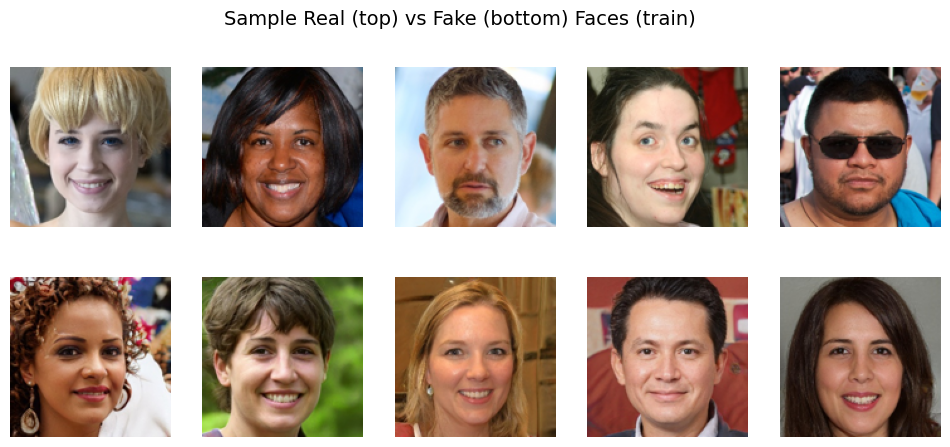

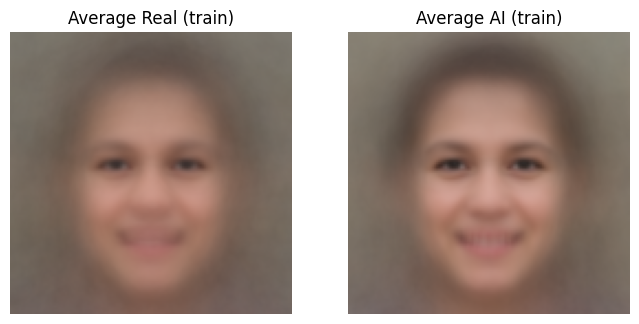

📊 Dataset statistics:
 Train  - Real: 509  AI: 509
 Val    - Real: 90  AI: 90
 Test   - Real: 150  AI: 150


In [6]:
# ============================================================
# Part 1 - Data Exploration
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# Quick sanity checks
print("Shapes:")
print(" X_train:", X_train.shape, " y_train:", y_train.shape)
print(" X_val:  ", X_val.shape, " y_val:  ", y_val.shape)
print(" X_test: ", X_test.shape, " y_test: ", y_test.shape)
print()

# Show sample real vs fake images from training set
def pick_n_per_class(X, y, n=5, cls=1):
    idxs = np.where(y == cls)[0]
    sel = np.random.choice(idxs, size=min(n, len(idxs)), replace=False)
    return X[sel]

np.random.seed(42)
real_samples = pick_n_per_class(X_test, y_test, n=5, cls=1)
fake_samples = pick_n_per_class(X_test, y_test, n=5, cls=0)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Sample Real (top) vs Fake (bottom) Faces (train)", fontsize=14)

for i in range(5):
    axes[0, i].imshow(real_samples[i].reshape(128, 128, 3))
    axes[0, i].axis("off")
    axes[1, i].imshow(fake_samples[i].reshape(128, 128, 3))
    axes[1, i].axis("off")
plt.show()

# Compute average faces (train)
avg_real = X_train[y_train == 1].mean(axis=0)
avg_fake = X_train[y_train == 0].mean(axis=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(avg_real.reshape(128, 128, 3)); ax1.set_title("Average Real (train)"); ax1.axis("off")
ax2.imshow(avg_fake.reshape(128, 128, 3)); ax2.set_title("Average AI (train)"); ax2.axis("off")
plt.show()

# Basic stats
print("📊 Dataset statistics:")
print(" Train  - Real:", np.sum(y_train==1), " AI:", np.sum(y_train==0))
print(" Val    - Real:", np.sum(y_val==1),   " AI:", np.sum(y_val==0))
print(" Test   - Real:", np.sum(y_test==1),  " AI:", np.sum(y_test==0))


## 🧠 Part 2: Multi-Layer Perceptron (MLP) Classifier

### 🏗️ **Building Our First Neural Network**

Time to build our baseline model! We'll start with a classic **Multi-Layer Perceptron (MLP)** - a fully connected neural network that will learn to distinguish real faces from AI-generated ones.

#### 🎯 **Architecture Overview:**
- **Input Layer**: Flattens our 128×128 grayscale images into a 49,152-dimensional vector
- **Hidden Layers**: Three dense layers with decreasing neurons (64 → 32 → 16 → 1)
- **Activation**: ReLU functions for non-linearity in hidden layers
- **Output Layer**: Single neuron with sigmoid activation for binary classification

#### ⚙️ **Training Configuration:**
- **📉 Optimizer**: Adam with learning rate = 0.001
- **🎲 Loss Function**: Binary cross-entropy (perfect for binary classification)
- **📊 Metrics**: Accuracy for intuitive performance tracking
- **🔄 Epochs**: 20 iterations through the entire dataset
- **📦 Batch Size**: 32 samples processed together

#### 📈 **What to Monitor:**
- **Training vs. Validation Curves**: Watch for overfitting if curves diverge
- **Best Validation Accuracy**: The peak performance on unseen data
- **Test Accuracy**: Final unbiased evaluation on held-out test set

#### 💡 **Key Insight:**
MLPs treat images as flat vectors, ignoring spatial relationships between pixels. This baseline will help us appreciate the power of CNNs in the next section!

🚀 **Run the cell below to train your first face detector!**

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,291,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,299,905 (24.03 MB)

 Trainable params: 6,299,905 (24.03 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.5138 - loss: 3.8875 - val_accuracy: 0.6111 - val_loss: 0.8896
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6405 - loss: 0.6990 - val_accuracy: 0.6056 - val_loss: 0.6594
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6532 - loss: 0.6726 - val_accuracy: 0.5944 - val_loss: 0.7812
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6690 - loss: 0.6347 - val_accuracy: 0.6500 - val_loss: 0.6351
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6768 - loss: 0.6022 - val_accuracy: 0.6722 - val_loss: 0.6306
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7014 - loss: 0.5625 - val_accuracy: 0.6611 - val_loss: 0.6323
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7181 - loss: 0.5325 - val_accuracy: 0.6833 - val_loss: 0.6312
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7358 - loss: 0.5050 - val_accuracy: 0.672

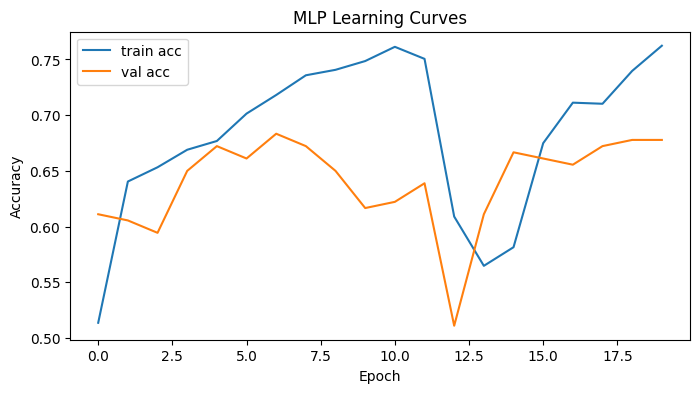

MLP test accuracy: 0.6733


In [8]:
# ============================================================
# Part 2 - Multi-Layer Perceptron
# ============================================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input # Import Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

tf.random.set_seed(42)

mlp_model = Sequential([
    Input(shape=(128, 128, 3)),  # Use Input layer for input shape
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(mlp_model.summary())

history_mlp = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Best validation accuracy and epoch
best_val_acc_mlp = np.max(history_mlp.history['val_accuracy'])
best_epoch_mlp = np.argmax(history_mlp.history['val_accuracy']) + 1
print(f"MLP best val acc: {best_val_acc_mlp:.4f} at epoch {best_epoch_mlp}")

# Plot learning curves
plt.figure(figsize=(8,4))
plt.plot(history_mlp.history['accuracy'], label='train acc')
plt.plot(history_mlp.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("MLP Learning Curves")
plt.show()

# Evaluate on test set
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP test accuracy: {mlp_test_acc:.4f}")

## 🖼️ Part 3: Convolutional Neural Network (CNN) - Baseline

### 🚀 **Leveraging Spatial Features with CNNs**

Now we're stepping up our game! Unlike MLPs that treat images as flat vectors, **Convolutional Neural Networks** understand the spatial structure of images, making them perfect for computer vision tasks.

#### 🏗️ **Architecture Breakdown:**
- **🔍 Conv Layers**: Multiple convolutional blocks with increasing filters (16→32→64)
- **📉 MaxPooling**: (2×2) after each block - Reduces spatial dimensions
- **🎯 BatchNormalization**: Normalizes activations for faster, more stable training
- **💧 Dropout**: Randomly drops connections to prevent overfitting
- **🌐 GlobalAveragePooling2D**: Elegantly reduces feature maps to single values
- **🧠 Dense Layers**: Final classification head with dropout

#### ⚙️ **Key Techniques:**
- **BatchNormalization**: Stabilizes training by normalizing layer inputs
- **Dropout**: Regularization technique (e.g., 0.2 = drop 20% of connections)
- **GlobalAveragePooling2D**: Better than Flatten() - reduces parameters and overfitting
- **Model Checkpointing**: Saves best model based on validation loss

#### 🔬 **What Makes CNNs Special:**
- **Local Connectivity**: Filters scan local regions, detecting patterns anywhere in the image
- **Parameter Sharing**: Same filter applied across the entire image
- **Hierarchical Learning**: Early layers detect edges → Middle layers detect shapes → Deep layers detect faces
- **Translation Invariance**: Can recognize features regardless of position

#### 📊 **Modern Best Practices Applied:**
- Conv → BatchNorm → Activation → Pool → Dropout (repeated blocks)
- GlobalAveragePooling instead of Flatten (fewer parameters, better generalization)
- Gradual increase in filters (16→32→64) as spatial dimensions decrease

🚀 **Run the cell below to train your CNN baseline model with these modern techniques!**

f:\Study\Sem 4\Hw1\HW1.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 128, 128, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 32)     │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_40 (Activation)      │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_41 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 96)             │         6,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 96)             │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_42 (Activation)      │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,641 (119.69 KB)

 Trainable params: 30,225 (118.07 KB)

 Non-trainable params: 416 (1.62 KB)

Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.5103 - loss: 0.7810
Epoch 1: val_loss improved from None to 0.69274, saving model to best_cnn_baseline.keras

Epoch 1: finished saving model to best_cnn_baseline.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step - accuracy: 0.5167 - loss: 0.7721 - val_accuracy: 0.5056 - val_loss: 0.6927
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.5410 - loss: 0.7133
Epoch 2: val_loss did not improve from 0.69274
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.5334 - loss: 0.7197 - val_accuracy: 0.5000 - val_loss: 0.6974
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.5567 - loss: 0.7054
Epoch 3: val_loss did not improve from 0.69274
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.5570 - loss: 0.7145 - val_accuracy: 0.5000 - val_loss: 0.7027
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.5528 - loss: 0.7058
Epoch 4: val_loss did not improve from 0.69274
32/32 ━━━━━━━━━━

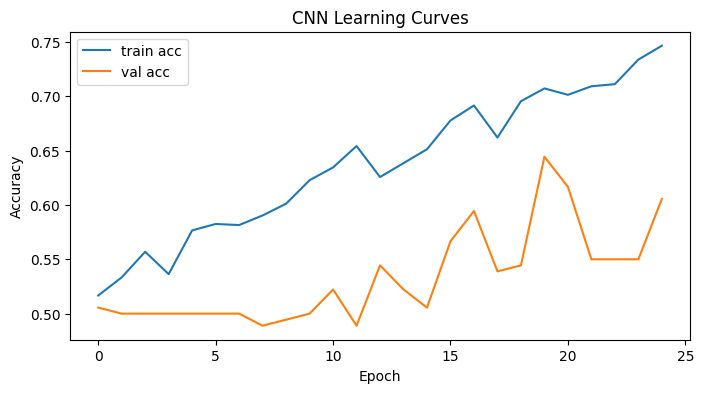

In [19]:
# ============================================================
# Part 3 - CNN (Baseline)
# ============================================================

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# ---- CNN baseline ----

cnn_model = Sequential([
    # First conv block
    Conv2D(16, (3,3), padding='same', use_bias=False, input_shape=(128,128,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.15),

    # Second conv block
    Conv2D(32, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.15),

    # Third conv block
    Conv2D(64, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.15),

    GlobalAveragePooling2D(),

    Dense(96),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),  # ← Increased final dropout

    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

checkpoint_cnn_path = "best_cnn_baseline.keras"
checkpoint_cnn = ModelCheckpoint(checkpoint_cnn_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

history_cnn = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=32,
    callbacks=[checkpoint_cnn],
    verbose=1
)

best_val_acc_cnn = np.max(history_cnn.history['val_accuracy'])
best_val_loss_cnn = np.min(history_cnn.history['val_loss'])
best_epoch_cnn = np.argmin(history_cnn.history['val_loss']) + 1
print(f">> CNN baseline best val acc: {best_val_acc_cnn:.4f} at epoch {best_epoch_cnn}")

# Load best baseline cnn and evaluate on test set
best_cnn = load_model(checkpoint_cnn_path)
cnn_test_loss, cnn_test_acc = best_cnn.evaluate(X_test, y_test, verbose=0)
print(f">> CNN baseline test acc (best model): {cnn_test_acc:.4f}")

# Plot learning curves
plt.figure(figsize=(8,4))
plt.plot(history_cnn.history['accuracy'], label='train acc')
plt.plot(history_cnn.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("CNN Learning Curves")
plt.show()

## 🚀 [TO DO] Part 4: CNN with Data Augmentation

### 🔄 **Why Data Augmentation Matters**

Data augmentation helps getting the most out of the data and also prevent overfitting by creating realistic variations of training images, effectively expanding your dataset without collecting new data. This makes models more robust and better at generalizing to unseen data.

#### 🎯 **Your Task:**
Enhance your CNN's performance using data augmentation for the real vs. AI face classification task.

#### 📝 **Implementation Guide:**

1. **Start with your Part 3 CNN architecture**

2. **Add data augmentation** (choose one approach):
   - **Option A**: Use `ImageDataGenerator` (simpler, but deprecated)
   - **Option B**: Use `tf.keras.layers` augmentation layers (modern approach)
   - Consider: rotation, shifts, zoom, flips
   - Keep transformations realistic and subtle for face images

3. **Train with augmented data**:
   - Apply augmentation ONLY to training data
   - Keep validation data unchanged

4. **Evaluate and compare**:
   - Plot learning curves
   - Compare with baseline performance

#### 🏷️ **Variable Naming**:
- Model: `cnn_aug_model`
- History: `history_cnn_aug`
- Checkpoint: `"best_cnn_aug.keras"`
- Test accuracy: `cnn_aug_test_acc`

#### 💡 **Tips:**
- Start with conservative augmentation parameters
- Monitor validation curves to ensure augmentation is helping
- Good augmentation should reduce the train-validation gap

🚀 **Implement your augmented CNN below:**

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_20 (Sequential)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 128, 128, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_55 (Activation)      │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 64, 64, 32)     │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_56 (Activation)      │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_57 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 96)             │         6,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 96)             │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_58 (Activation)      │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 30,641 (119.69 KB)

 Trainable params: 30,225 (118.07 KB)

 Non-trainable params: 416 (1.62 KB)

Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5176 - loss: 0.7793
Epoch 1: val_loss improved from None to 0.69630, saving model to best_cnn_aug.keras

Epoch 1: finished saving model to best_cnn_aug.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - accuracy: 0.5226 - loss: 0.7618 - val_accuracy: 0.5000 - val_loss: 0.6963
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5365 - loss: 0.7233
Epoch 2: val_loss did not improve from 0.69630
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.5432 - loss: 0.7242 - val_accuracy: 0.5000 - val_loss: 0.7037
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.5391 - loss: 0.7256
Epoch 3: val_loss did not improve from 0.69630
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.5609 - loss: 0.7101 - val_accuracy: 0.5000 - val_loss: 0.7128
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.5285 - loss: 0.7148
Epoch 4: val_loss did not improve from 0.69630
32/32 ━━━━━━━━━━━━━━━━━━━━

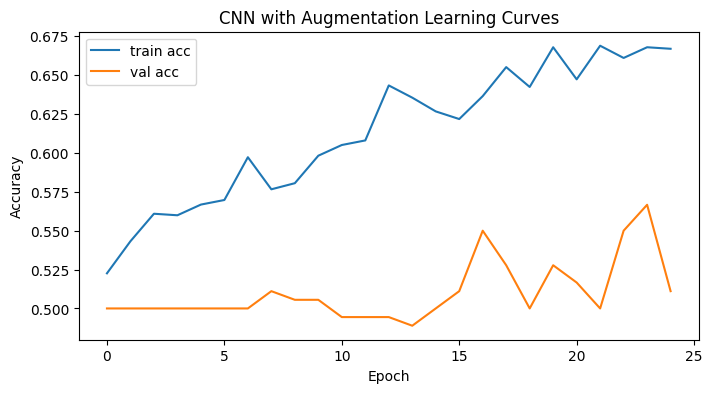

Baseline Test Accuracy: 0.6166666746139526
Augmented Test Accuracy: 0.596666693687439


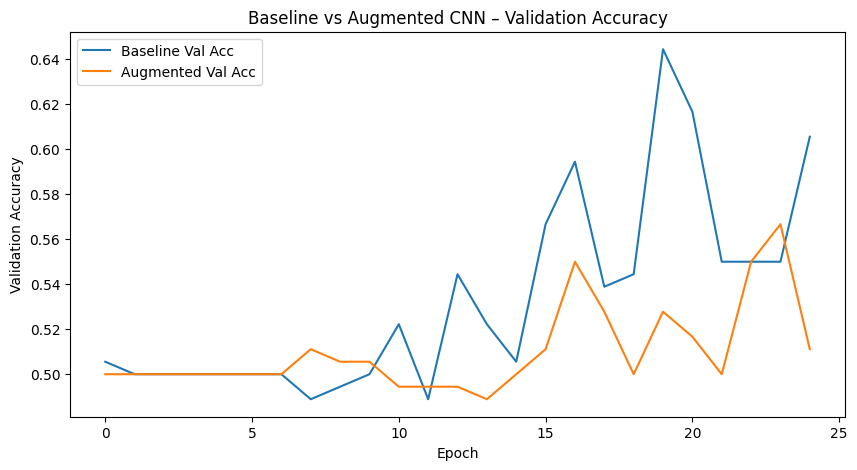

In [24]:
# ============================================================
# CNN with Data Augmentation
# ============================================================

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# ---- CNN with Data Augmentation ----

# data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

cnn_aug_model = Sequential([

    Input(shape=(128,128,3)),

    data_augmentation,

    # First conv block
    Conv2D(16, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.15),

    # Second conv block
    Conv2D(32, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.15),

    # Third conv block
    Conv2D(64, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.15),

    GlobalAveragePooling2D(),

    Dense(96),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),  # ← Increased final dropout

    Dense(1, activation='sigmoid')
])

cnn_aug_model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
cnn_aug_model.summary()

checkpoint_cnn_aug_path = "best_cnn_aug.keras"
checkpoint_cnn_aug = ModelCheckpoint(checkpoint_cnn_aug_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

history_cnn_aug = cnn_aug_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=32,
    callbacks=[checkpoint_cnn_aug],
    verbose=1
)

best_val_acc_cnn_aug = np.max(history_cnn_aug.history['val_accuracy'])
best_val_loss_cnn_aug = np.min(history_cnn_aug.history['val_loss'])
best_epoch_cnn_aug = np.argmin(history_cnn_aug.history['val_loss']) + 1
print(f">> CNN augmented best val acc: {best_val_acc_cnn_aug:.4f} at epoch {best_epoch_cnn_aug}")

# Load best augmented cnn and evaluate on test set
best_cnn_aug = load_model(checkpoint_cnn_aug_path)
cnn_aug_test_loss, cnn_aug_test_acc = best_cnn_aug.evaluate(X_test, y_test, verbose=0)
print(f">> CNN augmented test acc (best model): {cnn_aug_test_acc:.4f}")

# Plot learning curves
plt.figure(figsize=(8,4))
plt.plot(history_cnn_aug.history['accuracy'], label='train acc')
plt.plot(history_cnn_aug.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("CNN with Augmentation Learning Curves")
plt.show()


#Model Comparison
print("Baseline Test Accuracy:", cnn_test_acc)
print("Augmented Test Accuracy:", cnn_aug_test_acc)

plt.figure(figsize=(10,5))

# Baseline
plt.plot(history_cnn.history['val_accuracy'],
         label='Baseline Val Acc')

# Augmented
plt.plot(history_cnn_aug.history['val_accuracy'],
         label='Augmented Val Acc')

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Baseline vs Augmented CNN – Validation Accuracy")
plt.legend()
plt.show()

I found that this CNN architecture was not the best for the augmentation, and with the below architecture, I was able to get better results. 
I removed the dropout technique implemented. 

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_43 (Activation)      │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 32)     │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_44 (Activation)      │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_45 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 96)             │         6,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 96)             │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_46 (Activation)      │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,641 (119.69 KB)

 Trainable params: 30,225 (118.07 KB)

 Non-trainable params: 416 (1.62 KB)

Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.5007 - loss: 0.7730
Epoch 1: val_loss improved from None to 0.69314, saving model to best_cnn_aug.keras

Epoch 1: finished saving model to best_cnn_aug.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.5039 - loss: 0.7702 - val_accuracy: 0.5167 - val_loss: 0.6931
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.5585 - loss: 0.7065
Epoch 2: val_loss did not improve from 0.69314
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.5432 - loss: 0.7211 - val_accuracy: 0.4444 - val_loss: 0.6937
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.5714 - loss: 0.7099
Epoch 3: val_loss did not improve from 0.69314
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.5530 - loss: 0.7102 - val_accuracy: 0.5056 - val_loss: 0.6936
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.5620 - loss: 0.6979
Epoch 4: val_loss did not improve from 0.69314
32/32 ━━━━━━━━━━━━━━━━━━━

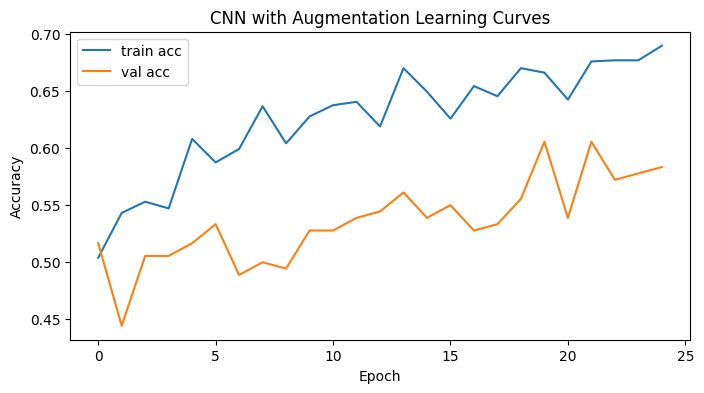

Baseline Test Accuracy: 0.6166666746139526
Augmented Test Accuracy: 0.6566666960716248


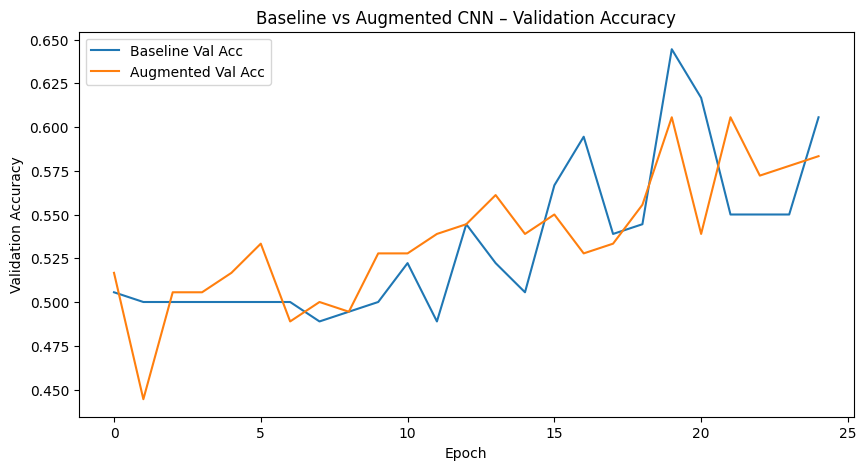

In [20]:
# ============================================================
# CNN with Data Augmentation
# ============================================================

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# ---- CNN with Data Augmentation ----

# data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    #layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

cnn_aug_model = Sequential([

    Input(shape=(128,128,3)),

    data_augmentation,

    # First conv block
    Conv2D(16, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    #Dropout(0.15),

    # Second conv block
    Conv2D(32, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    #Dropout(0.15),

    # Third conv block
    Conv2D(64, (3,3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    #Dropout(0.15),

    GlobalAveragePooling2D(),

    Dense(96),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),  # ← Increased final dropout

    Dense(1, activation='sigmoid')
])

cnn_aug_model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
cnn_aug_model.summary()

checkpoint_cnn_aug_path = "best_cnn_aug.keras"
checkpoint_cnn_aug = ModelCheckpoint(checkpoint_cnn_aug_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

history_cnn_aug = cnn_aug_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=32,
    callbacks=[checkpoint_cnn_aug],
    verbose=1
)

best_val_acc_cnn_aug = np.max(history_cnn_aug.history['val_accuracy'])
best_val_loss_cnn_aug = np.min(history_cnn_aug.history['val_loss'])
best_epoch_cnn_aug = np.argmin(history_cnn_aug.history['val_loss']) + 1
print(f">> CNN augmented best val acc: {best_val_acc_cnn_aug:.4f} at epoch {best_epoch_cnn_aug}")

# Load best augmented cnn and evaluate on test set
best_cnn_aug = load_model(checkpoint_cnn_aug_path)
cnn_aug_test_loss, cnn_aug_test_acc = best_cnn_aug.evaluate(X_test, y_test, verbose=0)
print(f">> CNN augmented test acc (best model): {cnn_aug_test_acc:.4f}")

# Plot learning curves
plt.figure(figsize=(8,4))
plt.plot(history_cnn_aug.history['accuracy'], label='train acc')
plt.plot(history_cnn_aug.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.title("CNN with Augmentation Learning Curves")
plt.show()


#Model Comparison
print("Baseline Test Accuracy:", cnn_test_acc)
print("Augmented Test Accuracy:", cnn_aug_test_acc)

plt.figure(figsize=(10,5))

# Baseline
plt.plot(history_cnn.history['val_accuracy'],
         label='Baseline Val Acc')

# Augmented
plt.plot(history_cnn_aug.history['val_accuracy'],
         label='Augmented Val Acc')

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Baseline vs Augmented CNN – Validation Accuracy")
plt.legend()
plt.show()

## 🚀 [TO DO] Part 5: Transfer Learning with MobileNetV3

---



### 🎓 **Standing on the Shoulders of Giants**

Why train from scratch when we can leverage models that have already learned from millions of images? **Transfer learning** allows us to use pre-trained models as powerful feature extractors. **MobileNetV3** (from ICCV 2019), trained on ImageNet's 1.4 million images, has already learned to recognize complex visual patterns that we can adapt for our face detection task!

#### 🎯 **Your Task:**
Implement transfer learning using MobileNetV3Small as a feature extractor for distinguishing real vs. AI-generated faces.

#### 🔎 **Check out their Paper/Presentation [OPTIONAL]:**
https://openaccess.thecvf.com/content_ICCV_2019/html/Howard_Searching_for_MobileNetV3_ICCV_2019_paper.html

#### 📝 **Implementation Steps:**

1. **🔄 Data Preprocessing**:
   - MobileNetV3 expects **[0, 255] range** inputs (NOT [0, 1]!)
   - Scale your data: `X_train_pp = X_train * 255.0`
   - Create preprocessed versions for train, validation, and test sets

2. **📦 Load Pre-trained MobileNetV3Small**:
   - Set `include_top=False` and `pooling='avg'`
   - Use `include_preprocessing=True` (handles internal scaling to [-1, 1])
   - Input shape: (128, 128, 3)

3. **🔒 Freeze Base Model**:
   - Set `base.trainable = False` to preserve ImageNet features

4. **🏗️ Build Complete Model**:
   - Add a small classifier head on top of the base model
   - Include regularization (Dropout, BatchNorm) to prevent overfitting

5. **⚙️ Compile & Train**:
   - Use Adam optimizer with low learning rate (e.g., 0.001, 0.0001, or 0.0005)
   - Consider data augmentation for better generalization
   - Save best model with ModelCheckpoint

6. **📊 Evaluate**:
   - Plot training curves (val loss vs training loss)
   - Report best validation accuracy and test accuracy

#### 🏷️ **Variable Naming Convention**:
- Preprocessed data: `X_train_pp`, `X_val_pp`, `X_test_pp`
- Model: `mobilenet_frozen`
- History: `history_mob_frozen`

#### 💡 **Pro Tips:**
- MobileNetV3Small has ~1.5M parameters - keep them frozen for this task
- The warning about 224x224 weights is normal - the model adapts to 128x128
- Transfer learning should converge quickly (often best results within 10-20 epochs)


🚀 **Time to harness the power of transfer learning! Code below:**

f:\Study\Sem 4\Hw1\HW1.venv\Lib\site-packages\keras\src\applications\mobilenet_v3.py:454: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 576)            │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 976,369 (3.72 MB)

 Trainable params: 37,121 (145.00 KB)

 Non-trainable params: 939,248 (3.58 MB)

Epoch 1/25
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5373 - loss: 0.7789
Epoch 1: val_loss improved from None to 0.68818, saving model to best_mobilenet_frozen.keras

Epoch 1: finished saving model to best_mobilenet_frozen.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 113ms/step - accuracy: 0.5560 - loss: 0.7608 - val_accuracy: 0.5556 - val_loss: 0.6882
Epoch 2/25
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5747 - loss: 0.7196
Epoch 2: val_loss improved from 0.68818 to 0.67281, saving model to best_mobilenet_frozen.keras

Epoch 2: finished saving model to best_mobilenet_frozen.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5923 - loss: 0.7029 - val_accuracy: 0.5944 - val_loss: 0.6728
Epoch 3/25
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6159 - loss: 0.6648
Epoch 3: val_loss improved from 0.67281 to 0.66098, saving model to best_mobilenet_frozen.keras

Epoch 3: finished saving model to best_mobilenet_frozen.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/st

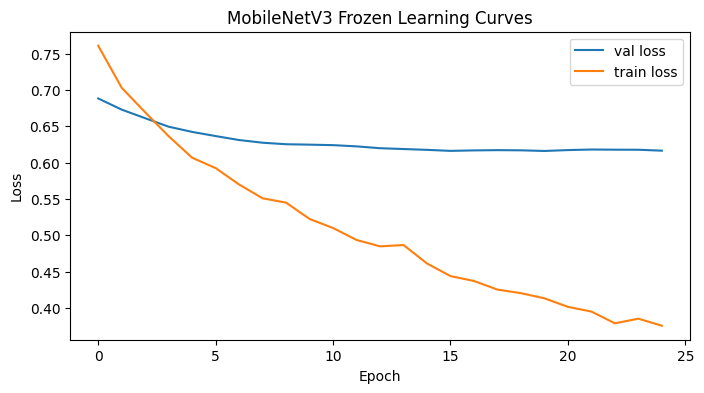

In [13]:
# ============================================================
# Part 5 - Transfer Learning (MobileNetV3Small)
# ============================================================

#Data Preprocessing
X_train_pp = X_train * 255.0
X_val_pp = X_val * 255.0
X_test_pp = X_test * 255.0

#Pre-trained MobileNetV3Small Model
base = tf.keras.applications.MobileNetV3Small(
    include_top=False,
    input_shape=(128,128,3),
    pooling='avg',
    include_preprocessing=True
)

#Freeze Base Model
base.trainable = False

#Complete Model
mobilenet_frozen = Sequential([
    Input(shape=(128, 128, 3)),
        #data_augmentation,
        base,
        Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.30),
    Dense(1, activation='sigmoid')
])

#Training
mobilenet_frozen.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
mobilenet_frozen.summary()

checkpoint_mobilenet_path = "best_mobilenet_frozen.keras"
checkpoint_mobilenet = ModelCheckpoint(checkpoint_mobilenet_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

history_mob_frozen = mobilenet_frozen.fit(
    X_train_pp,y_train,
    validation_data = (X_val_pp,y_val),
    epochs = 25,
    batch_size = 32,
    callbacks = [checkpoint_mobilenet],
    verbose = 1
                     )
best_val_acc_mobilenet = np.max(history_mob_frozen.history['val_accuracy'])
best_val_loss_mobilenet = np.min(history_mob_frozen.history['val_loss'])
best_epoch_mobilenet = np.argmax(history_mob_frozen.history['val_accuracy']) + 1
print(f">> Mobilenet Frozen baseline best val acc: {best_val_acc_mobilenet:.4f} at epoch {best_epoch_mobilenet}")

#Load best model and evaluate on test set
best_mobilenet = load_model(checkpoint_mobilenet_path)
mobilenet_test_loss, mobilenet_test_acc = best_mobilenet.evaluate(X_test_pp, y_test, verbose=0)
print(f">> Mobilenet Frozen baseline test acc (best model): {mobilenet_test_acc:.4f}")

#plots
plt.figure(figsize=(8,4))
plt.plot(history_mob_frozen.history['val_loss'], label = 'val loss')
plt.plot(history_mob_frozen.history['loss'],label = 'train loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("MobileNetV3 Frozen Learning Curves")
plt.show()


## 🚀 [TO DO] Part 6: Fine-tuning MobileNetV3

### 🎯 **Taking it Further with Fine-tuning**

Now that we've seen transfer learning with frozen weights, let's unlock the power of **fine-tuning**! We'll carefully unfreeze and retrain the last few layers of MobileNetV3 to adapt them specifically to our face detection task.

#### 📝 **Implementation Steps:**

1. **🔓 Selective Unfreezing**:
   - Start with your trained frozen model from Part 5
   - Unfreeze only the **last very few layers** of the base model (e.g., last 1-2 layers). Think about what type of layers are more suitable for fine-tuning.
   - Keep early layers frozen - they contain generic low-level features

2. **⚙️ Strategic Fine-tuning**:
   - Train for 15-30 epochs
   - Monitor closely - fine-tuning can lead to overfitting
   - Come up with some effective strategies to get the best out of the models and the data
   - Save the best model with ModelCheckpoint

3. **📊 Compare Results**:
   - Plot learning curves for fine-tuned model
   - Compare test accuracy: frozen vs fine-tuned
   - Which approach works better for this task?

#### 🏷️ **Variable Naming Convention**:
- Fine-tuned model: `mobilenet_finetuned`
- History: `history_mob_finetuned`
- Checkpoint: `"best_mobilenet_finetuned.keras"`

#### 💡 **Pro Tips:**
- Check how many layers you're unfreezing with `sum([layer.trainable for layer in base.layers])` also, what layers?
- Fine-tuning could potentially give you few % improvement
- It's much easier now for your model to overfit

#### 🤔 **Think About:**
- What startegies to use to make fine-tuning work better?
- Which layers (early or late) are more task-specific?
- When might fine-tuning hurt rather than help performance?

🚀 **Let's squeeze out every bit of performance! Code below:**

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 576)            │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 576)            │         2,304 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,089,393 (4.16 MB)

 Trainable params: 149,121 (582.50 KB)

 Non-trainable params: 940,272 (3.59 MB)

Epoch 1/20
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5685 - loss: 0.8131
Epoch 1: val_loss improved from None to 0.67227, saving model to best_mobilenet_finetuned.keras

Epoch 1: finished saving model to best_mobilenet_finetuned.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.5874 - loss: 0.7725 - val_accuracy: 0.6056 - val_loss: 0.6723 - learning_rate: 1.0000e-04
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6180 - loss: 0.7186
Epoch 2: val_loss improved from 0.67227 to 0.65385, saving model to best_mobilenet_finetuned.keras

Epoch 2: finished saving model to best_mobilenet_finetuned.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.6306 - loss: 0.7007 - val_accuracy: 0.6389 - val_loss: 0.6539 - learning_rate: 1.0000e-04
Epoch 3/20
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6704 - loss: 0.6310
Epoch 3: val_loss improved from 0.65385 to 0.64457, saving model to best_mobilenet_finetuned.keras

Epoch 3: finished saving mode

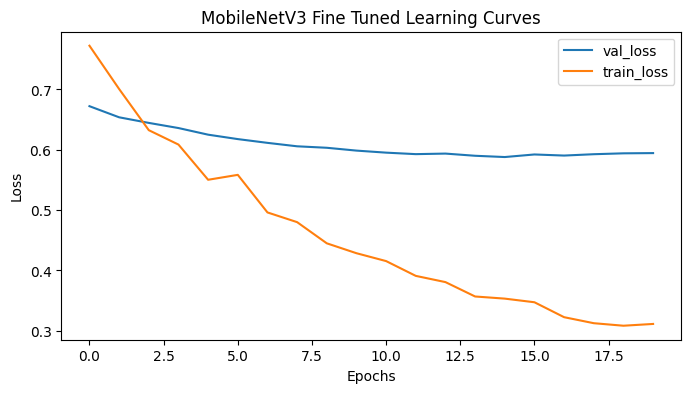

Test accuracy for Fine tuned Mobilenet =0.7366666793823242
Test accuracy for Frozen Mobilenet =0.7166666388511658


In [ ]:
# ============================================================
# Part 6 - Transfer Learning (MobileNetV3Small) + Fine-tuning
# ============================================================

#Load best Frozen model
mobilenet_frozen = load_model(checkpoint_mobilenet_path)

#Base model
base_model = mobilenet_frozen.layers[0]

#Unfreeze layers
base_model.trainable = False

for layer in base_model.layers[-2:]:
    layer.trainable = True

mobilenet_finetuned = Sequential([
        base_model,
        BatchNormalization(),
        Dense(256, activation='relu'), # Added "Thinking" layer
        Dropout(0.5),                  # Increased Dropout for regularization
        Dense(1, activation='sigmoid')
    ])

# 3. Optimization
    # Added ReduceLROnPlateau to lower LR if validation loss stalls
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,   # Divide LR by 5
        patience=3,   # Wait 3 epochs before reducing
        min_lr=1e-6,  # Don't go below 1e-6
        verbose=1
    )

#compile the complete model
mobilenet_finetuned.compile(optimizer = Adam(1e-4), loss = 'binary_crossentropy',metrics = ['accuracy'])
mobilenet_finetuned.summary()

#modelcheckpoint
checkpoint_mobilenet_finetuned_path = 'best_mobilenet_finetuned.keras'
checkpoint_mobilenet_finetuned = ModelCheckpoint(checkpoint_mobilenet_finetuned_path, verbose = 1, monitor = 'val_loss', mode = 'min', save_best_only = True)

#Train the model
history_mob_finetuned = mobilenet_finetuned.fit(
    X_train_pp,y_train,
    validation_data = (X_val_pp,y_val),
    epochs = 20,
    callbacks = [checkpoint_mobilenet_finetuned,reduce_lr],
    batch_size = 32,
    verbose = 1
    )

best_epoch_mobilenet_finetuned = np.argmax(history_mob_finetuned.history['val_accuracy']) + 1
best_val_acc_mobilenet_finetuned = np.max(history_mob_finetuned.history['val_accuracy'])
best_val_loss_mobilenet_finetuned = np.min(history_mob_finetuned.history['val_loss'])
print(f"Best val_acc is {best_val_acc_mobilenet_finetuned:.4f} in {best_epoch_mobilenet_finetuned:.4f} epoch")

#Evaluate best model with test data
best_model_mobilenet_finetuned = load_model(checkpoint_mobilenet_finetuned_path)
mobilenet_finetuned_test_loss, mobilenet_finetuned_test_acc = best_model_mobilenet_finetuned.evaluate(X_test_pp,y_test, verbose =0)
print(f">> Mobilenet Finetuned baseline test acc (best model): {mobilenet_finetuned_test_acc:.4f}")

#plots
plt.figure(figsize = (8,4))
plt.plot(history_mob_finetuned.history['val_loss'],label = 'val_loss')
plt.plot(history_mob_finetuned.history['loss'], label = 'train_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV3 Fine Tuned Learning Curves")
plt.show()

print(f"Test accuracy for Fine tuned Mobilenet ={mobilenet_finetuned_test_acc}")
print(f"Test accuracy for Frozen Mobilenet ={mobilenet_test_acc}")

## 🚀 [TO DO] Part 7: Model Comparison & Analysis

### 🏆 **The Ultimate Showdown: Which Model Reigns Supreme?**

Time to put all your models head-to-head! Let's comprehensively compare the performance of all approaches: MLP, CNN baseline, CNN with augmentation, MobileNetV3 transfer learning, and MobileNetV3 fine-tuned.

#### 🎯 **Your Task:**
Create comprehensive visualizations and analyses to compare all models and understand their predictions.

#### 📝 **Required Implementations:**

1. **📈 Performance Comparison Bar Chart**:
   - Create a grouped bar chart showing:
     - Best validation accuracy for each model
     - Test accuracy for each model
   - Models to compare: `MLP`, `CNN`, `CNN+Aug`, `MobileNet`, `MobileNet-FT`
   - Use different colors for validation vs. test metrics

2. **🎭 Confusion Matrices Grid**:
   - Generate predictions for all models on the test set
   - Create a 2×3 subplot grid showing confusion matrices
   - Include model names and test accuracy in titles
   - Use heatmap visualization with annotations showing counts

3. **🖼️ Qualitative Analysis - Sample Predictions**:
   - Select 8-10 interesting test images (mix of correct and incorrect predictions)
   - For each image, display:
     - The actual image
     - True label (T:0 for AI, T:1 for Real)
     - Predictions from ALL models (scores from sigmoid output)
   - Format: Image with model predictions listed below
   - Highlight disagreements between models


#### 💡 **Visualization Tips:**
- Use `plt.subplots()` for organized multi-panel figures
- Color-code: Green for correct predictions, Red for incorrect
- Sort confusion matrix with true labels on y-axis, predicted on x-axis
- For sample images, show probability scores (0.0 = AI, 1.0 = Real)

#### 🔍 **Example Analysis Questions to Answer:**
1. **Performance Ranking**: Which model performs best on the test set?
2. **Generalization**: Which model has the smallest train-validation gap?
3. **Confusion Patterns**: Do certain models favor precision vs. recall?
4. **Failure Cases**: What types of faces fool all models?
5. **Model Consensus**: When models disagree, which one is usually right?

#### 📊 **Expected Outputs:**
```python
Example format for displaying predictions
Image: [displayed]
True: 1 (Real)
MLP: 0.58 ✓ | CNN: 0.45 ✗ | CNN+Aug: 0.50 ✗
MobileNet: 0.75 ✓ | MobileNet-FT: 0.74 ✓

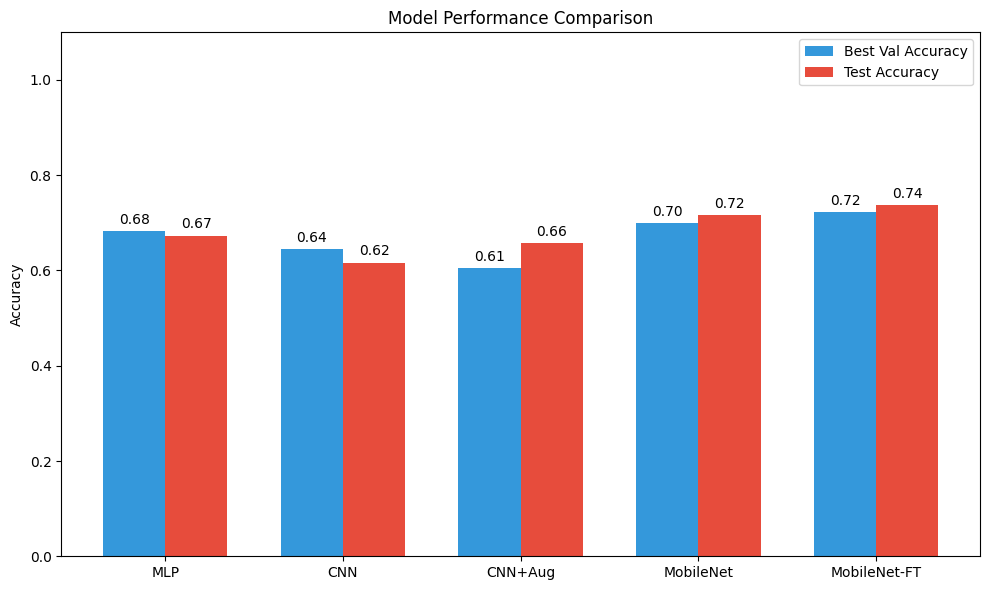

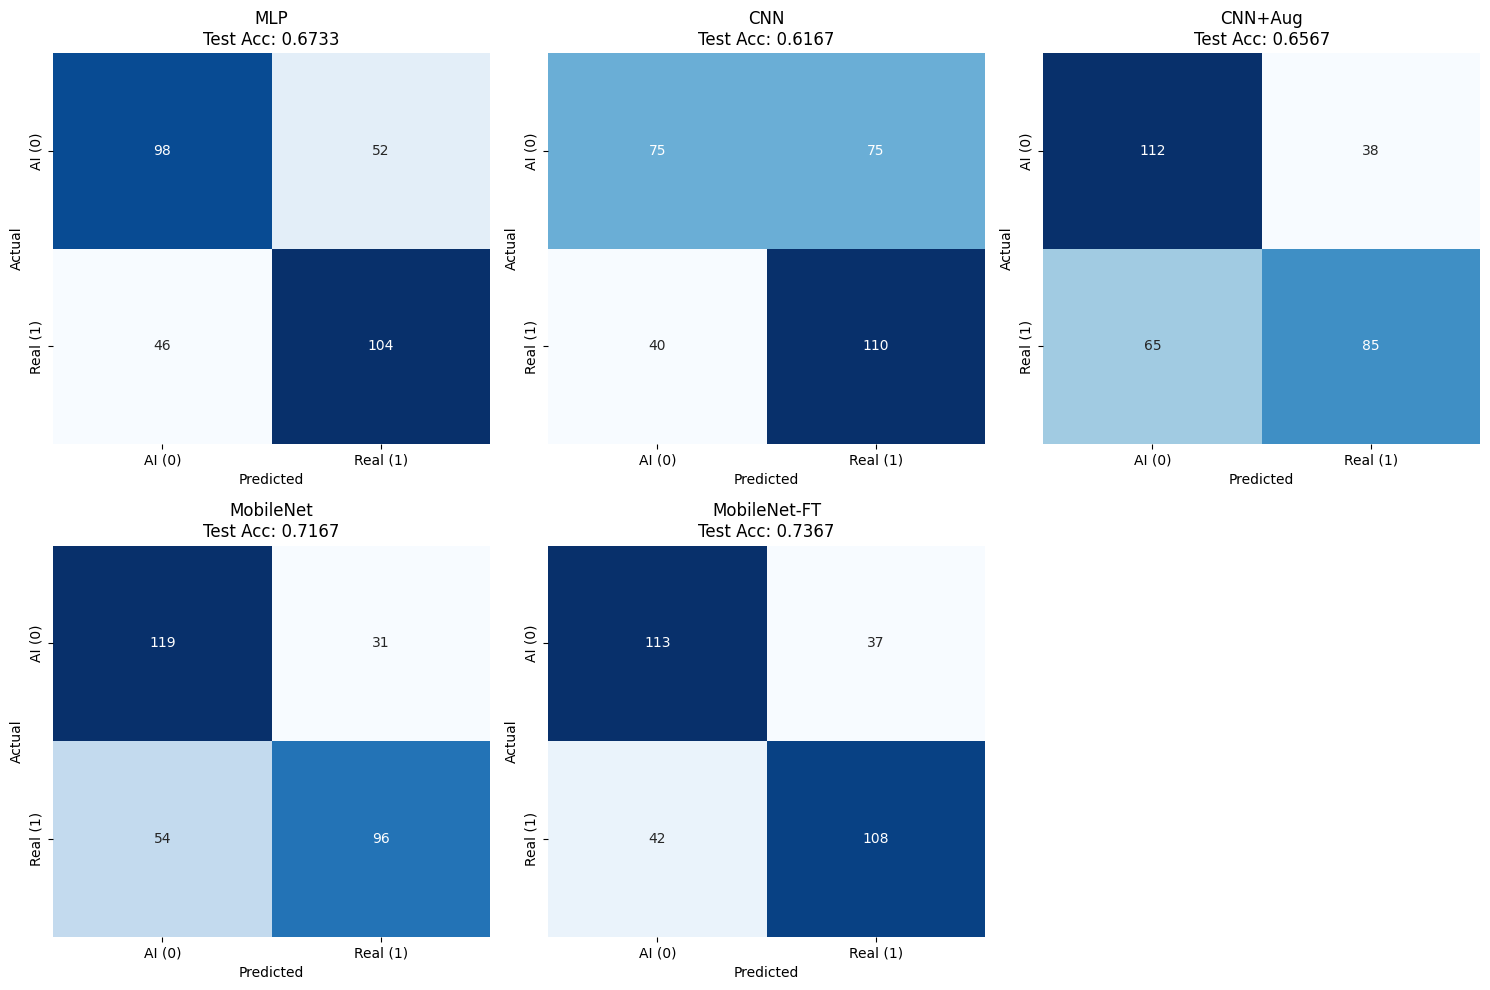

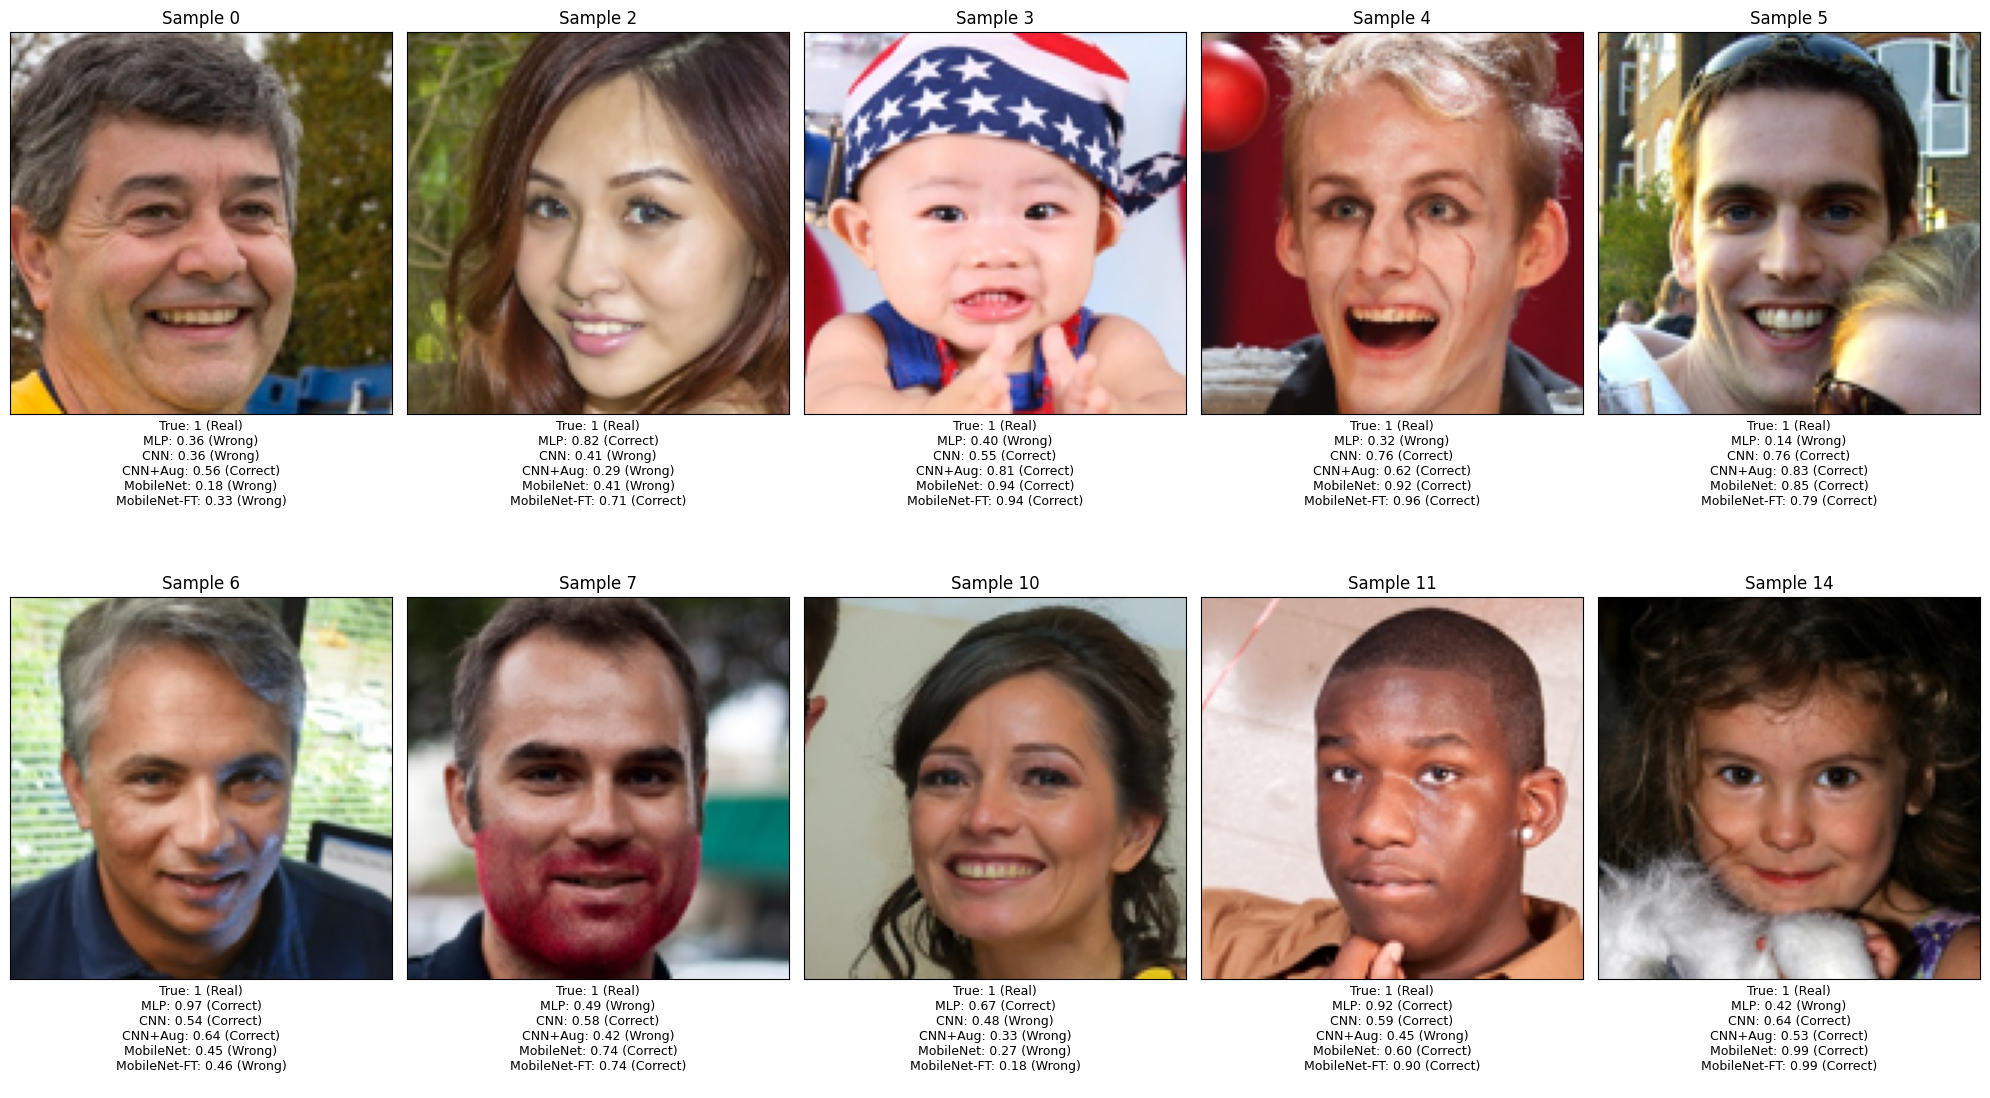

In [ ]:
# 1. Prepare Data
models = ['MLP', 'CNN', 'CNN+Aug', 'MobileNet', 'MobileNet-FT']

# Extracting validation accuracies from your history objects
# Note: For CNN+Aug, ensure you use the history from Part 4/Cell 13
val_accs = [
    best_val_acc_mlp,
    best_val_acc_cnn,
    best_val_acc_cnn_aug,
    best_val_acc_mobilenet,
    best_val_acc_mobilenet_finetuned
]

# Extracting test accuracies
test_accs = [
    mlp_test_acc,
    cnn_test_acc,
    cnn_aug_test_acc,
    mobilenet_test_acc,
    mobilenet_finetuned_test_acc
]

x = np.arange(len(models))
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, val_accs, width, label='Best Val Accuracy', color='#3498db')
rects2 = ax.bar(x + width/2, test_accs, width, label='Test Accuracy', color='#e74c3c')

ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.1)
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

#2. confusion matrices grid
# Helper to get binary predictions (0 or 1)
def get_preds(model, data):
    return (model.predict(data, verbose=0) > 0.5).astype("int32")

#  Generate all predictions
all_preds = [
    get_preds(mlp_model, X_test),
    get_preds(best_cnn, X_test),
    get_preds(best_cnn_aug, X_test),
    get_preds(best_mobilenet, X_test_pp),
    get_preds(best_model_mobilenet_finetuned, X_test_pp)
]

#  Plot Grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (name, preds, acc) in enumerate(zip(models, all_preds, test_accs)):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(f'{name}\nTest Acc: {acc:.4f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_xticklabels(['AI (0)', 'Real (1)'])
    axes[i].set_yticklabels(['AI (0)', 'Real (1)'])

# Hide the last subplot if comparing only 5 models
axes[-1].axis('off')
plt.tight_layout()
plt.show()

#3. Qualitative Analysis
# Get raw scores (probabilities) for analysis
all_scores = [
    mlp_model.predict(X_test, verbose=0).flatten(),
    best_cnn.predict(X_test, verbose=0).flatten(),
    best_cnn_aug.predict(X_test, verbose=0).flatten(),
    best_mobilenet.predict(X_test_pp, verbose=0).flatten(),
    best_model_mobilenet_finetuned.predict(X_test_pp, verbose=0).flatten()
]

# Find indices where models disagree
binary_preds = np.array([ (s > 0.5).astype(int) for s in all_scores ])
disagreement_idx = np.where(np.std(binary_preds, axis=0) > 0)[0]

# Pick 10 interesting indices 

unique_indices = set()
# Add disagreement indices first
unique_indices.update(disagreement_idx)
# If we have fewer than 10, fill with other indices
fallback_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for idx in fallback_indices:
    if len(unique_indices) >= 10:
        break
    unique_indices.add(idx)

# Take exactly 10 unique indices
sample_indices = list(unique_indices)[:10]

# Visualization
plt.figure(figsize=(20, 12))
for i, idx in enumerate(sample_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])

    true_label = "Real" if y_test[idx] == 1 else "AI"
    title_color = 'green' # Placeholder

    # Text to display below image
    pred_text = f"True: {y_test[idx]} ({true_label})\n"
    for m_name, scores in zip(models, all_scores):
        score = scores[idx]
        pred_label = 1 if score > 0.5 else 0
        # Bold/Highlight if prediction is wrong
        mark = "(Wrong)" if pred_label != y_test[idx] else "(Correct)"
        pred_text += f"{m_name}: {score:.2f} {mark}\n"

    plt.title(f"Sample {idx}")
    plt.xlabel(pred_text, fontsize=9)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

## 🎮 [TO DO] Part 8: Interactive Game - Human vs. AI Detector

### 🤖 **Can You Beat Your Model?**

Time to make your project interactive! Build a fun game where humans compete against your best-performing model to identify AI-generated faces. Deploy it on Hugging Face Spaces to share with the world!

#### 🎯 **Your Task:**
Create a Gradio interface that gamifies the real vs. AI face detection challenge, then deploy it on Hugging Face Spaces.
- Check out [Which Face is Real?](https://whichfaceisreal.com/) for inspiration


#### 📝 **Implementation Requirements:**

1. **🎯 Core Game Mechanics**:
   - Display pairs or single images from the test set
   - User guesses: Real or AI-generated?
   - Model makes its prediction
   - Compare results and keep score
   - Track accuracy for both human and model

2. **🖼️ Interface Components**:
   - Image display area
   - "Real" and "AI-Generated" buttons for user input
   - Score display (Human vs. Model)
   - "Next Image" button to continue playing
   - Results/feedback area showing correct answer

3. **🎨 Game Features to Implement**:
   - **Round Counter**: Track number of images tested
   - **Live Scoring**: Human accuracy vs. Model accuracy
   - **Feedback**: Reveal correct answer with visual feedback
   - **Final Summary**: After N rounds, show who won!

4. **🚀 Deployment Steps**:
   - Save your best model as `best_model.h5` or `.keras`
   - Create `app.py` with your Gradio interface
   - Create `requirements.txt` with dependencies
   - Deploy to Hugging Face Spaces
   - Test with friends and family!


### >>> **Some Optional Tips**: <<<<
#### 📋 **Gradio Interface Structure**:
Use `gr.Blocks()` for custom layout with themes like `gr.themes.Soft()`. Structure your interface with:
- Title and instructions at the top
- Game area with image and buttons in the middle
- Scores and results at the bottom

#### 💡 **Pro Tips:**
- Pre-load a batch of test images for smooth gameplay
- Make it mobile-responsive with `gr.Blocks()`


#### 🎨 **Design**:
- Make it your own, but consider:
  - A nice layout
  - Scoring systems
  - Creative visual feedback (confetti for wins, color changes)


#### 📦 **Files for Hugging Face Spaces**:
1. `app.py` - Your Gradio application
2. `best_model.keras` - Your trained model
3. `requirements.txt` - Include: `tensorflow`, `gradio`, `numpy`, `Pillow`
4. `test_images/` - Folder with sample test images
5. `README.md` - Describe your project


🚀 **Time to bring your model to life! Create an engaging game that educates and entertains:**

## 📦 Final Deliverables

Submit the following:

1. **Completed Colab Notebook URL**
   - Fully executed with all outputs visible
   
2. **Brief Report (2-3 pages PDF)**
   - Model performance comparison table
   - Key learning curves
   - Main insights and conclusions
   
3. **Hugging Face Spaces URL**
   - Working Gradio demo with your best model

## ✅ Submission Checklist

Before submitting, ensure you have:
- [ ] Completed all code sections (Parts 4-7)
- [ ] All models train properly (no clear signs of overfitting/underfitting)
- [ ] Created all required visualizations
- [ ] Colab runs without errors from top to bottom
- [ ] Report is informative and concise (≤3 pages)
- [ ] Gradio app successfully deployed and working
- [ ] All URLs are accessible and functional

**Good luck! 🚀**